# CAR'S SALES PRICE PREDICTION

## Define the Problem  
### Build a model that predicts the Sales Price of Car's.

### AUTHOR: JAIMINKUMAR

# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
from sklearn import datasets, model_selection, preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load Data

In [2]:
df=pd.read_csv(r'F:\DATA SCIENCE 2023\CodSoft\Jaimin\TASK 4 - CAR PRICE PREDICTION\car_purchasing.csv',encoding='unicode_escape')

# Explore Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [4]:
df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [5]:
# Drop columns that doesn't required for the prediction
df = df.drop(['customer name', 'customer e-mail'], axis=1)

In [6]:
# Separate features (X) and target variable (y)
X = df.drop('car purchase amount', axis=1)
y = df['car purchase amount']

# Split Data

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using ColumnTransformer and Pipeline

In [8]:
# Preprocessing using ColumnTransformer and Pipeline
numeric_features = ['age', 'annual Salary', 'credit card debt', 'net worth']
categorical_features = ['country', 'gender']

In [9]:
# Create transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

#and categorical transformer
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [10]:
# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
('cat', categorical_transformer, categorical_features)])

In [11]:
# Create a pipeline with the preprocessing and the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

In [12]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'annual Salary',
                                                   'credit card debt',
                                                   'net worth']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['country', 'gender'])])),
                ('regressor', LinearRegression())])

In [13]:
# Make predictions
y_pred = model.predict(X_test)

In [14]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [15]:
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Squared Error: 2.7912480536840456
Mean Absolute Error: 1.2683926210096979
R-squared: 0.999999974148686


# Visualize best fit line

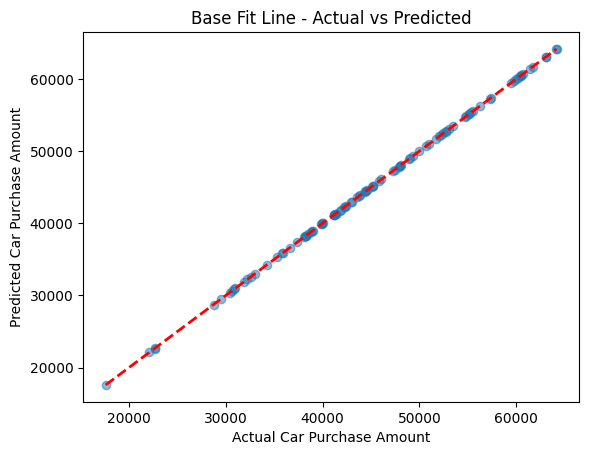

In [16]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Base Fit Line - Actual vs Predicted')
plt.xlabel('Actual Car Purchase Amount')
plt.ylabel('Predicted Car Purchase Amount')
plt.show()

## The pipeline with preprocessing and linear regression has been executed, resulting in a Mean Absolute Error of approximately 1.15 and an R^2 score of approximately 1.0, indicating an excellent fit to the test data.